In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
df = pd.read_csv('task3df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
print(df.shape)
# df.columns
df.dropna(inplace=True)#.reset_index()
print(df.shape)
df = df.reset_index()

(11455, 65)
(7791, 65)


In [17]:
# df = pd.read_csv('task3df.csv')
# df.drop(columns = ['Unnamed: 0'], inplace=True)

# X = df[[
#     'fm.mean', 'Wind.mean', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY',
#     'FIRE_YEAR', 'cont_time', 'PROJECTED_FINAL_IM_COST', 'ACRES',
#     'TOTAL_PERSONNEL', 'STR_DAMAGED', 'WF_FSR', 'FATALITIES', 'FIRE_SIZE',
#     'eco1_10  NORTH AMERICAN DESERTS', 'eco1_11  MEDITERRANEAN CALIFORNIA',
#     'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
#     'eco1_15  TROPICAL WET FORESTS', 
# #     'eco1_2  TUNDRA', 'eco1_3  TAIGA',
#     'eco1_5  NORTHERN FORESTS', 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
#     'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
#     'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
#     'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
#     'FUEL_MODEL_Dormant Brush, Hardwood Slash',
#     'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
#     'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
#     'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
#     'FUEL_MODEL_Tall Grass (2.5 feet)',
#     'FUEL_MODEL_Timber (Grass and Understory)',
#     'FUEL_MODEL_Timber (Litter and Understory)', 'GROWTH_POTENTIAL_Extreme',
#     'GROWTH_POTENTIAL_High', 'GROWTH_POTENTIAL_Low',
#     'GROWTH_POTENTIAL_Medium', 'TERRAIN_Extreme', 'TERRAIN_High',
#     'TERRAIN_Low', 'TERRAIN_Medium', 'FIRE_SIZE_CLASS_A',
#     'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
#     'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G'
#     ]].copy()

X = df[['fm.mean', 'Wind.mean', #'LATITUDE', 'LONGITUDE',
               # add in responses from 3
       'cont_time',
       'PROJECTED_FINAL_IM_COST', 'TOTAL_PERSONNEL_SUM', 'STR_DAMAGED_TOTAL',
       'FATALITIES', 'FIRE_SIZE',
        # dummies
 'eco1_10  NORTH AMERICAN DESERTS',
       'eco1_11  MEDITERRANEAN CALIFORNIA',
       'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
       'eco1_15  TROPICAL WET FORESTS', 'eco1_5  NORTHERN FORESTS',
       'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
       'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
       'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
       'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
       'FUEL_MODEL_Dormant Brush, Hardwood Slash',
       'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
       'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
       'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
       'FUEL_MODEL_Tall Grass (2.5 feet)',
       'FUEL_MODEL_Timber (Grass and Understory)',
       'FUEL_MODEL_Timber (Litter and Understory)', 
       'TERRAIN_Extreme', 'TERRAIN_High', 'TERRAIN_Low', 'TERRAIN_Medium',
       'GROWTH_POTENTIAL_Extreme', 'GROWTH_POTENTIAL_High',
       'GROWTH_POTENTIAL_Low', 'GROWTH_POTENTIAL_Medium', 'SEASON_fall',
       'SEASON_spring', 'SEASON_summer', 'SEASON_winter',
        # add in fire class
        'FIRE_SIZE_CLASS_A',
       'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
       'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G',
        ]].copy()

y_cols = ['STAT_CAUSE_DESCR_Arson', 'STAT_CAUSE_DESCR_Campfire',
       'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
       'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
       'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous',
       'STAT_CAUSE_DESCR_Powerline', 'STAT_CAUSE_DESCR_Railroad',
       'STAT_CAUSE_DESCR_Smoking', 'STAT_CAUSE_DESCR_Structure']
    
# y = pd.DataFrame()
temp = np.empty((X.shape[0],1))
y = pd.DataFrame(temp, columns=['cause'])

for i, col in enumerate(y_cols):
    y[df[col] == 1] = col.split('_')[-1]

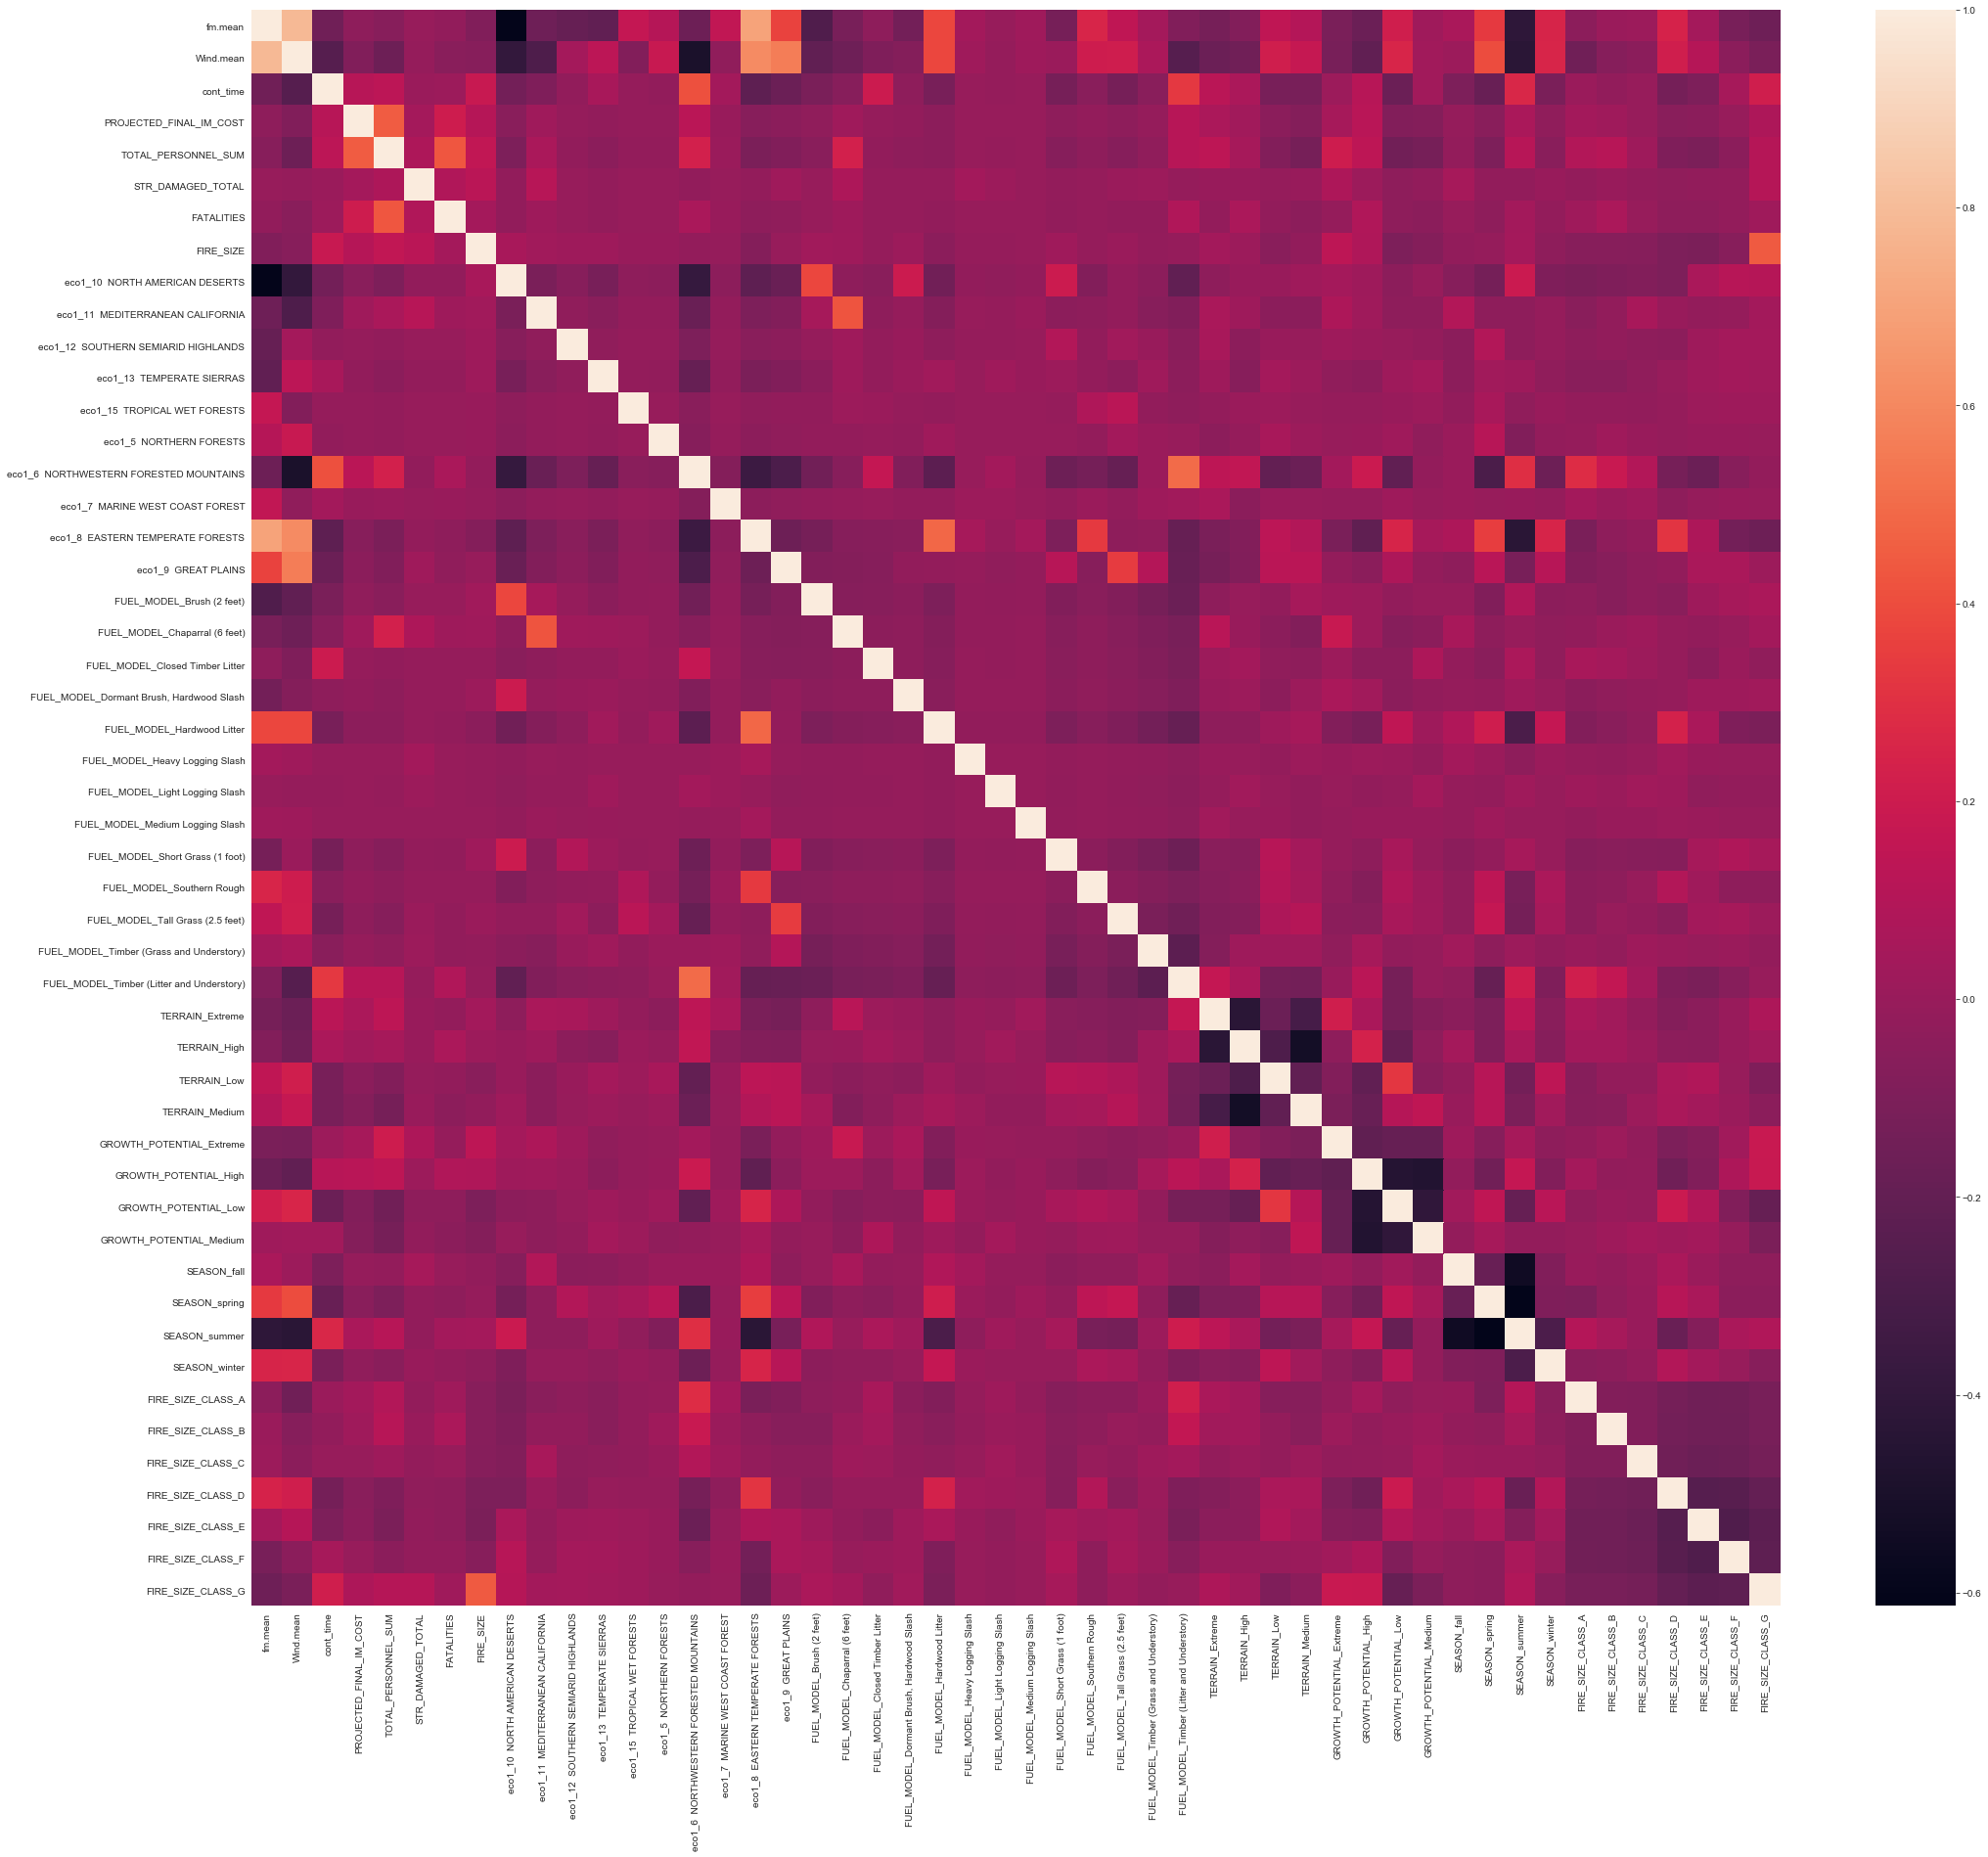

In [18]:
sns.set_palette("Purples_d")
sns.set_style('whitegrid')

plt.subplots(figsize=(35,30))
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def per_class_acc(y_true, y_pred, class_names):
    class_names = y_true['cause'].unique()
    
    cm = multilabel_confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(cm.shape)
    
    print("Accuracy:")
    for i in range(cm.shape[0]):
        print("    {}: {}".format(class_names[i], np.around(cm[i],3)))
        
print("==================")
print("=== No Scaling ===")
print("==================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(f"Total acc: {rf.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
(unique, counts) = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)
print(f"Total acc: {dtc.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
(unique, counts) = np.unique(y_pred, return_counts=True)
print(f"Total acc: {knn.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== LDA ===")
lda = LinearDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
(unique, counts) = np.unique(y_pred, return_counts=True)
print(f"Total acc: {lda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== QDA ===")
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
(unique, counts) = np.unique(y_pred, return_counts=True)
print(f"Total acc: {qda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

# print("\n=== MLP ===")
# mlp = MLPClassifier().fit(X_train, y_train.values.ravel())
# y_pred = mlp.predict(X_test)
# print(f"Total acc: {mlp.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Linear SVC ===")
# lsvc = LinearSVC().fit(X_train, y_train.values.ravel())
# y_pred = lsvc.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Logistic Regression (multinomial) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

# print("\n=== Logistic Regression (ovr) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

=== No Scaling ===

=== Random Forest ===
Total acc: 0.6683771648492624
(12, 2, 2)
Accuracy:
    Arson: [[0.952 0.518]
 [0.048 0.482]]
    Miscellaneous: [[0.972 1.   ]
 [0.028 0.   ]]
    Debris Burning: [[0.995   nan]
 [0.005   nan]]
    Lightning: [[0.971 0.556]
 [0.029 0.444]]
    Campfire: [[0.945 0.864]
 [0.055 0.136]]
    Equipment Use: [[0.995   nan]
 [0.005   nan]]
    Fireworks: [[0.887 0.234]
 [0.113 0.766]]
    Powerline: [[0.877 0.623]
 [0.123 0.377]]
    Children: [[0.987 1.   ]
 [0.013 0.   ]]
    Smoking: [[0.994 0.   ]
 [0.006 1.   ]]
    Structure: [[0.994 1.   ]
 [0.006 0.   ]]
    Railroad: [[0.999   nan]
 [0.001   nan]]

=== Decision Tree Classifier ===
[['Arson' 159]
 ['Campfire' 58]
 ['Children' 5]
 ['Debris Burning' 98]
 ['Equipment Use' 88]
 ['Fireworks' 1]
 ['Lightning' 926]
 ['Miscellaneous' 195]
 ['Powerline' 20]
 ['Railroad' 4]
 ['Smoking' 4]
 ['Structure' 1]]
Total acc: 0.5535599743425272
(12, 2, 2)
Accuracy:
    Arson: [[0.925 0.667]
 [0.075 0.333]]
    M

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Total acc: 0.6395125080179602
(12, 2, 2)
Accuracy:
    Arson: [[0.951 0.586]
 [0.049 0.414]]
    Miscellaneous: [[0.974 0.857]
 [0.026 0.143]]
    Debris Burning: [[0.995 1.   ]
 [0.005 0.   ]]
    Lightning: [[0.96  0.767]
 [0.04  0.233]]
    Campfire: [[0.945 0.857]
 [0.055 0.143]]
    Equipment Use: [[0.995 1.   ]
 [0.005 0.   ]]
    Fireworks: [[0.842 0.23 ]
 [0.158 0.77 ]]
    Powerline: [[0.874 0.643]
 [0.126 0.357]]
    Children: [[0.987 1.   ]
 [0.013 0.   ]]
    Smoking: [[0.994   nan]
 [0.006   nan]]
    Structure: [[0.994 1.   ]
 [0.006 0.   ]]
    Railroad: [[0.999 1.   ]
 [0.001 0.   ]]

=== QDA ===
Total acc: 0.11738293778062861
(12, 2, 2)
Accuracy:
    Arson: [[0.9 0.4]
 [0.1 0.6]]
    Miscellaneous: [[0.973 0.938]
 [0.027 0.062]]
    Debris Burning: [[0.995   nan]
 [0.005   nan]]
    Lightning: [[0.954 0.958]
 [0.046 0.042]]
    Campfire: [[0.943 0.972]
 [0.057 0.028]]
    Equipment Use: [[0.995   nan]
 [0.005   nan]]
    Fireworks: [[0.451 0.074]
 [0.549 0.926]]
    Po

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [22]:
print("====================")
print("=== With Scaling ===")
print("====================")
# Scale continuous variables
scaler = StandardScaler()
X.loc[:,X.columns[0:8]] = scaler.fit_transform(X[(X.columns[0:8])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(f"Total acc: {rf.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(f"Total acc: {dtc.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(f"Total acc: {knn.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== LDA ===")
lda = LinearDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
print(f"Total acc: {lda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== QDA ===")
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
print(f"Total acc: {qda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

# print("\n=== MLP ===")
# mlp = MLPClassifier().fit(X_train, y_train.values.ravel())
# y_pred = mlp.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Linear SVC ===")
# lsvc = LinearSVC().fit(X_train, y_train.values.ravel())
# y_pred = lsvc.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Logistic Regression (multinomial) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

# print("\n=== Logistic Regression (ovr) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

=== With Scaling ===

=== Random Forest ===
Total acc: 0.6696600384862091
(12, 2, 2)
Accuracy:
    Arson: [[0.951 0.536]
 [0.049 0.464]]
    Miscellaneous: [[0.972 1.   ]
 [0.028 0.   ]]
    Debris Burning: [[0.995   nan]
 [0.005   nan]]
    Lightning: [[0.97  0.552]
 [0.03  0.448]]
    Campfire: [[0.944 0.913]
 [0.056 0.087]]
    Equipment Use: [[0.995   nan]
 [0.005   nan]]
    Fireworks: [[0.894 0.231]
 [0.106 0.769]]
    Powerline: [[0.878 0.62 ]
 [0.122 0.38 ]]
    Children: [[0.987 1.   ]
 [0.013 0.   ]]
    Smoking: [[0.994 0.   ]
 [0.006 1.   ]]
    Structure: [[0.994   nan]
 [0.006   nan]]
    Railroad: [[0.999   nan]
 [0.001   nan]]

=== Decision Tree Classifier ===
Total acc: 0.5561257216164208
(12, 2, 2)
Accuracy:
    Arson: [[0.927 0.673]
 [0.073 0.327]]
    Miscellaneous: [[0.972 0.981]
 [0.028 0.019]]
    Debris Burning: [[0.995 1.   ]
 [0.005 0.   ]]
    Lightning: [[0.968 0.758]
 [0.032 0.242]]
    Campfire: [[0.946 0.898]
 [0.054 0.102]]
    Equipment Use: [[0.995 1. 

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Total acc: 0.6401539448364336
(12, 2, 2)
Accuracy:
    Arson: [[0.946 0.599]
 [0.054 0.401]]
    Miscellaneous: [[0.972 0.97 ]
 [0.028 0.03 ]]
    Debris Burning: [[0.995   nan]
 [0.005   nan]]
    Lightning: [[0.968 0.642]
 [0.032 0.358]]
    Campfire: [[0.945 0.886]
 [0.055 0.114]]
    Equipment Use: [[0.995   nan]
 [0.005   nan]]
    Fireworks: [[0.847 0.231]
 [0.153 0.769]]
    Powerline: [[0.87  0.644]
 [0.13  0.356]]
    Children: [[0.987   nan]
 [0.013   nan]]
    Smoking: [[0.994   nan]
 [0.006   nan]]
    Structure: [[0.994   nan]
 [0.006   nan]]
    Railroad: [[0.999   nan]
 [0.001   nan]]

=== LDA ===
Total acc: 0.6395125080179602
(12, 2, 2)
Accuracy:
    Arson: [[0.951 0.586]
 [0.049 0.414]]
    Miscellaneous: [[0.974 0.857]
 [0.026 0.143]]
    Debris Burning: [[0.995 1.   ]
 [0.005 0.   ]]
    Lightning: [[0.96  0.767]
 [0.04  0.233]]
    Campfire: [[0.945 0.857]
 [0.055 0.143]]
    Equipment Use: [[0.995 1.   ]
 [0.005 0.   ]]
    Fireworks: [[0.842 0.23 ]
 [0.158 0.77 ]]

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [52]:
### try stratifying ###
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit


print("====================")
print("=== With Stratification ===")
print("====================")
# Scale continuous variables
# scaler = StandardScaler()
# X.loc[:,X.columns[0:8]] = scaler.fit_transform(X[(X.columns[0:8])])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
# ...     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X.loc[train_index], X.loc[test_index]
     y_train, y_test = y.loc[train_index], y.loc[test_index]

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(f"Total acc: {rf.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(f"Total acc: {dtc.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(f"Total acc: {knn.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== LDA ===")
lda = LinearDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
print(f"Total acc: {lda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== QDA ===")
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
print(f"Total acc: {qda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)


=== With Stratification ===

=== Random Forest ===
Total acc: 0.6635010266940452
(12, 2, 2)
Accuracy:
    Debris Burning: [[0.942 0.539]
 [0.058 0.461]]
    Lightning: [[0.968 0.897]
 [0.032 0.103]]
    Powerline: [[0.996 1.   ]
 [0.004 0.   ]]
    Arson: [[0.957 0.556]
 [0.043 0.444]]
    Miscellaneous: [[0.95  0.852]
 [0.05  0.148]]
    Railroad: [[0.997 1.   ]
 [0.003 0.   ]]
    Equipment Use: [[0.888 0.24 ]
 [0.112 0.76 ]]
    Campfire: [[0.888 0.635]
 [0.112 0.365]]
    Fireworks: [[0.987 1.   ]
 [0.013 0.   ]]
    Smoking: [[0.996 0.75 ]
 [0.004 0.25 ]]
    Children: [[0.995   nan]
 [0.005   nan]]
    Structure: [[0.999   nan]
 [0.001   nan]]

=== Decision Tree Classifier ===
Total acc: 0.5556981519507187
(12, 2, 2)
Accuracy:
    Debris Burning: [[0.924 0.634]
 [0.076 0.366]]
    Lightning: [[0.968 0.944]
 [0.032 0.056]]
    Powerline: [[0.996 1.   ]
 [0.004 0.   ]]
    Arson: [[0.955 0.746]
 [0.045 0.254]]
    Miscellaneous: [[0.951 0.889]
 [0.049 0.111]]
    Railroad: [[0.997 

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide



Total acc: 0.6373203285420944
(12, 2, 2)
Accuracy:
    Debris Burning: [[0.938 0.596]
 [0.062 0.404]]
    Lightning: [[0.969 0.866]
 [0.031 0.134]]
    Powerline: [[0.996 1.   ]
 [0.004 0.   ]]
    Arson: [[0.955 0.674]
 [0.045 0.326]]
    Miscellaneous: [[0.952 0.809]
 [0.048 0.191]]
    Railroad: [[0.997 1.   ]
 [0.003 0.   ]]
    Equipment Use: [[0.829 0.242]
 [0.171 0.758]]
    Campfire: [[0.882 0.641]
 [0.118 0.359]]
    Fireworks: [[0.987 1.   ]
 [0.013 0.   ]]
    Smoking: [[0.996   nan]
 [0.004   nan]]
    Children: [[0.995   nan]
 [0.005   nan]]
    Structure: [[0.999   nan]
 [0.001   nan]]

=== LDA ===
Total acc: 0.6316735112936345
(12, 2, 2)
Accuracy:
    Debris Burning: [[0.936 0.594]
 [0.064 0.406]]
    Lightning: [[0.969 0.862]
 [0.031 0.138]]
    Powerline: [[0.996 1.   ]
 [0.004 0.   ]]
    Arson: [[0.953 0.688]
 [0.047 0.312]]
    Miscellaneous: [[0.95  0.818]
 [0.05  0.182]]
    Railroad: [[0.997 1.   ]
 [0.003 0.   ]]
    Equipment Use: [[0.838 0.235]
 [0.162 0.765]]

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide



In [53]:
(unique, countsTr) = np.unique(y_train, return_counts=True)
(unique1, countsTe) = np.unique(y_test, return_counts=True)
# fig = go.Figure([go.Bar(x=unique, y=counts, text=counts, textposition='auto')])
# fig.update_layout(xaxis={'categoryorder':'total descending'}, title="Distribution of Train Set")
# fig.show()

labels = unique

fig = go.Figure(data=[
    go.Bar(name='Train', x=labels, y=countsTr, text=countsTr),
    go.Bar(name='Test', x=labels, y=countsTe, text=countsTe)
])

fig.update_layout(xaxis={'categoryorder':'total descending'}, title="Stratified Train vs. Test Set")
fig.show()

print(countsTr, countsTe)

[ 420  125   15  226  201   13 2290  515   51   17   20    2] [ 420  126   15  227  202   13 2290  515   51   16   19    2]


In [23]:
impt = rf.feature_importances_
rf_feat_impt = {}
for i, v in enumerate(impt):
    rf_feat_impt[X.columns[i]] = v
    
rf_feat_impt = dict(sorted(rf_feat_impt.items(), key=lambda item: item[1], reverse=True))
rf_feat_impt

{'FIRE_SIZE': 0.12999626193690256,
 'PROJECTED_FINAL_IM_COST': 0.11990854446228727,
 'TOTAL_PERSONNEL_SUM': 0.11424838384690414,
 'cont_time': 0.10353097942262031,
 'SEASON_summer': 0.057254990656246486,
 'Wind.mean': 0.04487174189744725,
 'fm.mean': 0.038460169845819764,
 'SEASON_spring': 0.02321584049119354,
 'TERRAIN_High': 0.019308112053228004,
 'TERRAIN_Medium': 0.018954450240567078,
 'GROWTH_POTENTIAL_Medium': 0.0167072325763024,
 'GROWTH_POTENTIAL_Low': 0.016519083130506818,
 'GROWTH_POTENTIAL_High': 0.01612046379198425,
 'eco1_8  EASTERN TEMPERATE FORESTS': 0.015228595451464044,
 'FIRE_SIZE_CLASS_E': 0.014567997255693459,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.014485528510095772,
 'FUEL_MODEL_Hardwood Litter': 0.014377365540086595,
 'TERRAIN_Extreme': 0.013193074682376162,
 'FIRE_SIZE_CLASS_D': 0.01264671263105726,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.012580032678270027,
 'FIRE_SIZE_CLASS_F': 0.012548098035306599,
 'SEASON_fall': 0.011796969851187413,
 'STR_D

In [24]:
impt = dtc.feature_importances_
dtc_feat_impt = {}
for i, v in enumerate(impt):
    dtc_feat_impt[X.columns[i]] = v
    
dtc_feat_impt = dict(sorted(dtc_feat_impt.items(), key=lambda item: item[1], reverse=True))
dtc_feat_impt

{'FIRE_SIZE': 0.15218242095171775,
 'PROJECTED_FINAL_IM_COST': 0.13694971872100187,
 'SEASON_summer': 0.13134876634757955,
 'TOTAL_PERSONNEL_SUM': 0.13124661913056604,
 'cont_time': 0.09371364884426998,
 'fm.mean': 0.046152902424729504,
 'eco1_11  MEDITERRANEAN CALIFORNIA': 0.02348567398882021,
 'TERRAIN_Medium': 0.019999165609644154,
 'TERRAIN_High': 0.01854611367564369,
 'GROWTH_POTENTIAL_Medium': 0.016830136763489732,
 'GROWTH_POTENTIAL_Low': 0.013816966375736173,
 'GROWTH_POTENTIAL_High': 0.013629124488489906,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.01357046019547142,
 'TERRAIN_Extreme': 0.013395624402066568,
 'STR_DAMAGED_TOTAL': 0.012323266957381894,
 'TERRAIN_Low': 0.011877503202574588,
 'FUEL_MODEL_Short Grass (1 foot)': 0.010790774109629257,
 'FUEL_MODEL_Tall Grass (2.5 feet)': 0.010775595596877416,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.01041637932320449,
 'FUEL_MODEL_Hardwood Litter': 0.010267792686151373,
 'GROWTH_POTENTIAL_Extreme': 0.008864505798994992,
 '

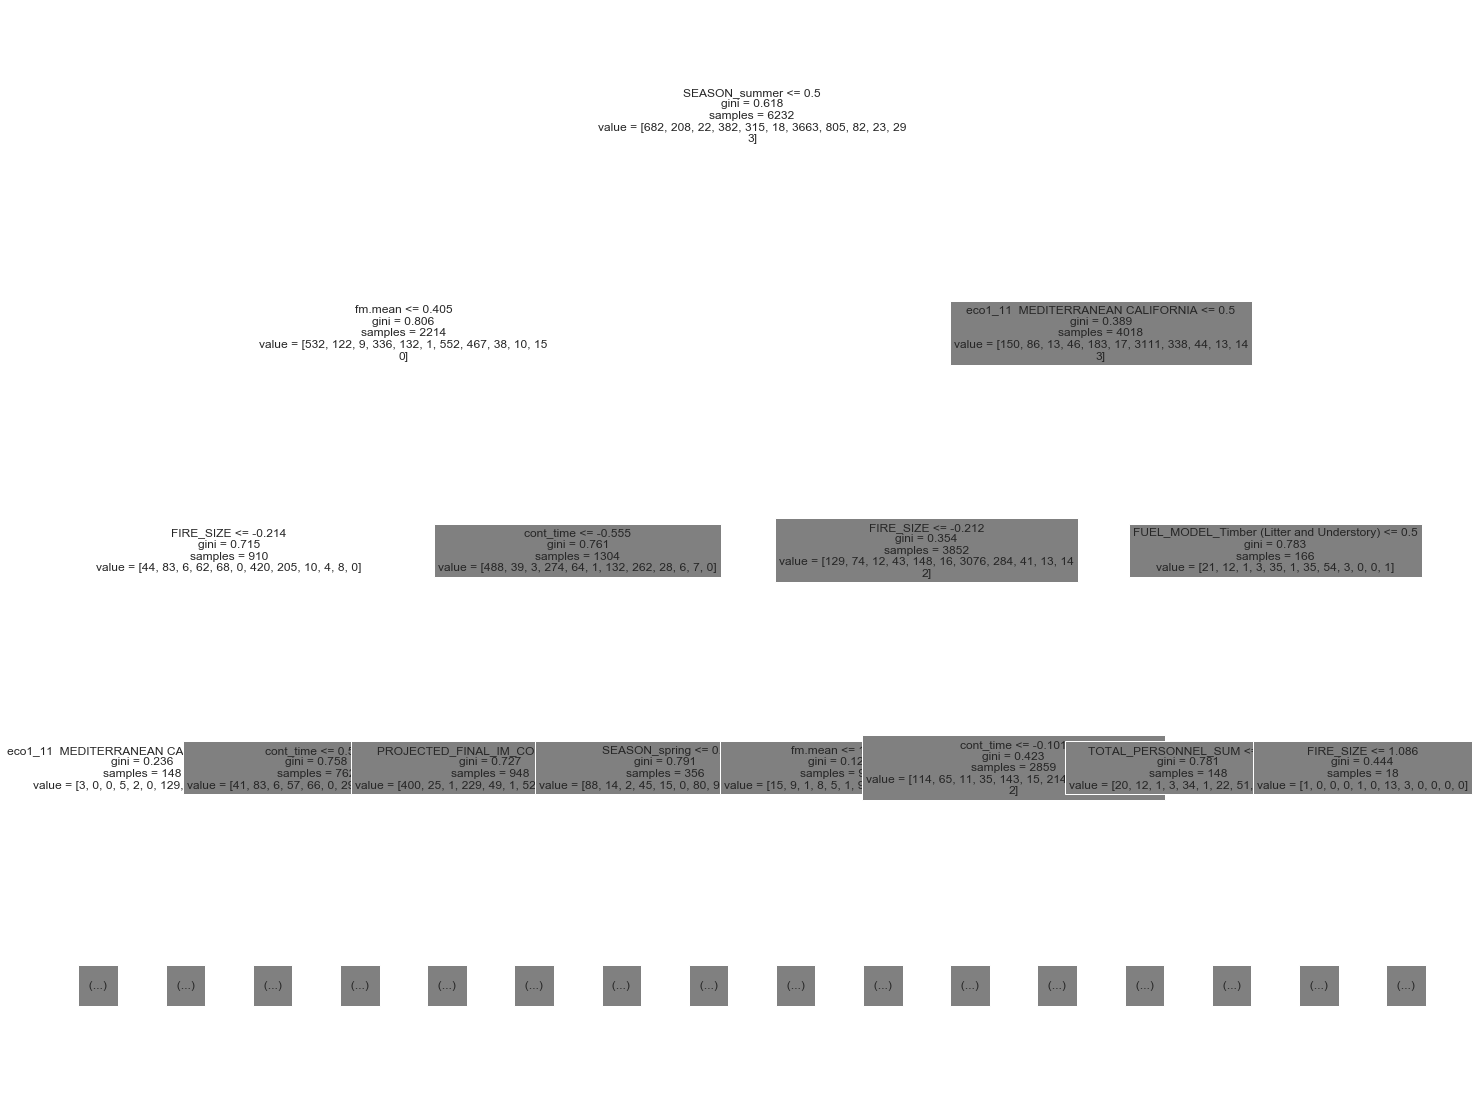

In [25]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=12)